**IST664 Lab 2 (Morphology, Tokenization, Stemming, Corpus Linguistics)**

Corpus linguistics pertains to describing overviews of tokens derived from a corpus. As a reminder, a corpus (plural: corpora) is simply a  body of text.

Corpus-linguistic analyses are often based on the evaluation of word occurrence frequencies within a corpus or across corpora.

Conducting corpus-linguistic analyses usually begins with pre-processing and tokenizing the texts.

In this lab session, we will use NLTK to do some of these tasks. We are going to work with "raw" text, so that we can do some detailed work. In particular, we are going to make our own token lists, filter them, and use some tools that calculate ocurrence frequencies. Note that documentation on how to create and manipulate corpora appears in this chapter of the NLTK book: http://www.nltk.org/book/ch02.html

## Section 2.1 ##

###Tokenization Tricks from NLPIA
In Chapter 2, NLPIA begins to dig into the details of how tokenization allows us to create data representations of documents that can be used for downstream analysis. In the following code, make sure to pay attention to the data structures used to represent sentences.

In [27]:
# Here's a tokenization code from NLPIA:
sentence = """Thomas Jefferson began building Monticello at the
age of 26."""

sentence.split()

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26.']

In [28]:
#This is an equivalent function call:
str.split(sentence)

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26.']

In [29]:
# Now let's start to build an array of "one hot encoded" tokens.
import numpy as np
token_sequence = str.split(sentence) # Split at spaces, save the result
vocab = sorted(set(token_sequence)) # Get a sorted list of the unique tokens
', '.join(vocab) # Show them as a comma-separated sequence

'26., Jefferson, Monticello, Thomas, age, at, began, building, of, the'

In [30]:
num_tokens = len(token_sequence) # Count the total number of tokens
vocab_size = len(vocab) # And the size of the vocabulary
onehot_vectors = np.zeros((num_tokens, vocab_size), int) # Fill an array with zeroes

# Now build a list of num_tokens vectors, where just a single value of 1 is filled in for each one.

# Note: enumerate() is a powerful Python construct that steps through the elements of an object, returning an index and the corresponding element.

for i, word in enumerate(token_sequence):
  onehot_vectors[i, vocab.index(word)] = 1

onehot_vectors # Show the results

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Note how a "one hot" vector lives up to its name. In each row of this matrix, there is one and only one entry that is set to one. In this matrix, each column therefore represents one type of token - i.e., one element of our vocabulary (in alphabetical order as it turns out). The rows in the case indicate the individual entries in this particular sentence.

The displays below present the same data but with some better labeling and in the second display a suppresion of displaying the zeroes.

In [31]:
#num_tokens
vocab_size


10

In [32]:
# Finally, stick the result in a Pandas dataframe
import pandas as pd
df1 = pd.DataFrame(onehot_vectors, columns=vocab) # Create the dataframe
df2 = df1.copy() # Make a copy
df2[df2 == 0] = '' # Fill in with blanks to show the idea of a sparse matrix
print(df1) # This is the full version with zeroes
print(df2) # This is the sparse version with blanks

   26.  Jefferson  Monticello  Thomas  age  at  began  building  of  the
0    0          0           0       1    0   0      0         0   0    0
1    0          1           0       0    0   0      0         0   0    0
2    0          0           0       0    0   0      1         0   0    0
3    0          0           0       0    0   0      0         1   0    0
4    0          0           1       0    0   0      0         0   0    0
5    0          0           0       0    0   1      0         0   0    0
6    0          0           0       0    0   0      0         0   0    1
7    0          0           0       0    1   0      0         0   0    0
8    0          0           0       0    0   0      0         0   1    0
9    1          0           0       0    0   0      0         0   0    0
  26. Jefferson Monticello Thomas age at began building of the
0                               1                             
1             1                                               
2       

C:\Users\Black Knight\AppData\Local\Temp\ipykernel_16768\2135519449.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2[df2 == 0] = '' # Fill in with blanks to show the idea of a sparse matrix


Notice in the displays above how the original word order is represented in the data structure. For example, the first row (row 0) has a "1" in the Thomas column, because Thomas was the first token in the original string.

In [33]:
# Next we will extend the idea of one hot encoding so that we can represent the tokens that appear in multiple sentences.
# Here we treat each sentence as a document.

# Let's make a list of two sentences:
sentences = """Thomas Jefferson began building Monticello at the age of 26.\n"""
sentences += """Local masons and carpenters began constructing the building."""

# The sentences string contains two lines of text separated by a newline character \n.
print(sentences)

Thomas Jefferson began building Monticello at the age of 26.
Local masons and carpenters began constructing the building.


In [34]:

# This time we will construct a term document matrix using the tokens from both sentences.
# We will use a Python dictionary to help with this process.
corpus = {} # Start an empty dictionary

for i, sent in enumerate(sentences.split('\n')):
  corpus['sent{}'.format(i)] = dict((tok, 1) for tok in sent.split())

corpus

{'sent0': {'Thomas': 1,
  'Jefferson': 1,
  'began': 1,
  'building': 1,
  'Monticello': 1,
  'at': 1,
  'the': 1,
  'age': 1,
  'of': 1,
  '26.': 1},
 'sent1': {'Local': 1,
  'masons': 1,
  'and': 1,
  'carpenters': 1,
  'began': 1,
  'constructing': 1,
  'the': 1,
  'building.': 1}}

In [35]:
# Next we can create a pandas data frame from the dict
df3 = pd.DataFrame.from_records(corpus).fillna(0).astype(int).T

df3

,Thomas,Jefferson,began,building,Monticello,at,the,age,of,26.,Local,masons,and,carpenters,constructing,building.
sent0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
sent1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,1


This dataframe contains the "classic" form of a **Term-Document Matrix**, with terms arrayed as columns and documents as rows. Each cell therefore represents a count of occurrences of a particular token within one document.

We do have prepackaged functions for making DTMs, so in the future we will not have to program this kind of loop ourselves.

In [36]:
# We can measure overlap between sentences with the dot product
df4 = df3.T # Transpose the df3 matrix for the calculation
df4.sent0.dot(df4.sent1) # How much overlap? 2

np.int64(2)

In [37]:
# Question 1:
# Write a new sentence that has some overlap in words with the first two.

sentences = """Thomas Jefferson began building Monticello at the age of 26.\n"""
sentences += """Local masons and carpenters began constructing the building.\n"""

sentences += """Monticello was the primary residence and plantation of Thomas Jefferson."""
print(sentences)


Thomas Jefferson began building Monticello at the age of 26.
Local masons and carpenters began constructing the building.
Monticello was the primary residence and plantation of Thomas Jefferson.


In [38]:
# Re-process the last few code blocks to recreate the data frame.
# Calculate all three of the pairwise dot products.
corpus = {} # Start an empty dictionary

for i, sent in enumerate(sentences.split('\n')):
  corpus['sent{}'.format(i)] = dict((tok, 1) for tok in sent.split())

corpus


{'sent0': {'Thomas': 1,
  'Jefferson': 1,
  'began': 1,
  'building': 1,
  'Monticello': 1,
  'at': 1,
  'the': 1,
  'age': 1,
  'of': 1,
  '26.': 1},
 'sent1': {'Local': 1,
  'masons': 1,
  'and': 1,
  'carpenters': 1,
  'began': 1,
  'constructing': 1,
  'the': 1,
  'building.': 1},
 'sent2': {'Monticello': 1,
  'was': 1,
  'the': 1,
  'primary': 1,
  'residence': 1,
  'and': 1,
  'plantation': 1,
  'of': 1,
  'Thomas': 1,
  'Jefferson.': 1}}

In [39]:
# Solution
df3 = pd.DataFrame.from_records(corpus).fillna(0).astype(int).T

df3

,Thomas,Jefferson,began,building,Monticello,at,the,age,of,26.,...,masons,and,carpenters,constructing,building.,was,primary,residence,plantation,Jefferson.
sent0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
sent1,0,0,1,0,0,0,1,0,0,0,...,1,1,1,1,1,0,0,0,0,0
sent2,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,1,1,1,1,1


np.int64(2)

In [49]:
df4 = df3.T # Transpose the df3 matrix for the calculation

# Dot product of sent0 and sent1
overlap_01 = df4.sent0.dot(df4.sent1)
print(f"\nOverlap between sent0 and sent1: {overlap_01}")

# Dot product of sent0 and sent2
overlap_02 = df4.sent0.dot(df4.sent2)
print(f"Overlap between sent0 and sent2: {overlap_02}")

# Dot product of sent1 and sent2
overlap_12 = df4.sent1.dot(df4.sent2)
print(f"Overlap between sent1 and sent2: {overlap_12}")



Overlap between sent0 and sent1: 2
Overlap between sent0 and sent2: 4
Overlap between sent1 and sent2: 2


### Section 2.2
The code blocks above demonstrate several important concepts from Chapter 2 of NLPIA on a very small data set of short sentences. Let's move on now to getting a large dataset of sentences from the Jane Austen novel, "Emma." We can tokenize and describe Emma using some similar techniques.

In [50]:
# In this code, we import the NLTK, download the Gutenberg texts, extract a list of file identifiers from the downloaded material
# and show the filename for the first file in the list, Emma, by Jane Austen.

import nltk # Bring in the NLP toolkit
nltk.download('gutenberg') # Then import the Gutenberg library, which has books
print(nltk.corpus.gutenberg.fileids())
file0 = nltk.corpus.gutenberg.fileids()[0] # Extract the book names
print(file0)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
austen-emma.txt


[nltk_data] Downloading package gutenberg to C:\Users\Black
[nltk_data]     Knight\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [51]:
emmatext = nltk.corpus.gutenberg.raw(file0) # Get the raw text of the book
print (len(emmatext)) # This tells the length of the string in characters
print(type(emmatext)) # And this shows the type of the emmatext object.

887071
<class 'str'>


In [52]:
# Question 2:
# What function call could we add to get a "directory" of all of the attributes of emmatext, including the bound methods?
# The dir() function gives a directory of all the attributes of the object

# Solution
dir(emmatext) 

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'stri

We now have the text as a string of characters, and the len() function has told us how many characters are in that text. The type() function has shown us that the data type is "str" for string. Remember that in Python a string is an immutable type that we can "slice" using the square brackets slicing technique.

In [44]:
emmatext[:120] # Show the first 120 characters

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nan'

In [ ]:
# Each of these print statements shows the number of tokens yielded by different tokenization techniques.
# Technique 1
print(len(emmatext.split())) # The builtin Python split function

# Technique 2
import re
print(len(re.findall("[\w]+", emmatext))) # A simple regex that splits on words

# Technique 3
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize


158167
161983


<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Black Knight\AppData\Local\Temp\ipykernel_16768\3085436025.py:7: SyntaxWarning: invalid escape sequence '\w'
  print(len(re.findall("[\w]+", emmatext))) # A simple regex that splits on words
[nltk_data] Downloading package punkt to C:\Users\Black
[nltk_data]     Knight\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Black
[nltk_data]     Knight\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [54]:

# Question 3:
# Use the word_tokenize() function that we just imported to find out how many tokens are yielded by that method.
# Print the result.

# Solution

tokens3 = word_tokenize(emmatext)
print(len(tokens3))

191855


## Section 2.3 ##

As the numbers above show, the tokenizer you choose has a substantial effect on the number of tokens that are yielded. NLTK has several tokenizers available. We will next use a sentence tokenizer to divide the Emma text into about 7500 separate sentences, then we will create a DTM to represent those sentences.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# splits a string of text into a list of sentences
emmasentences = nltk.sent_tokenize(emmatext)

# converts a collection of text documents/ list of sentences into a numerical matrix of token counts
vectorizer = CountVectorizer()
emma_dtf = vectorizer.fit_transform(emmasentences)

# shape is a matrix with # of rows and # of columns. So 7493 rows means sentences, while 7239 columns means # of unique tokens/words.
emma_dtf.shape

(7493, 7239)

Make sure you understand the two numbers just presented. The shape attribute shows the number of rows and the number of columns. The rows of this emma_dft data structure contain the sentences and the columns the tokens/terms.

In [56]:
# Let's examine some of our tokens in the DTM
token_names = vectorizer.get_feature_names_out()
print(len(token_names)) # Total number of terms in our DTM
token_names[0:20] # The first 20 elements of the DTM

7239


array(['000', '10', '1816', '23rd', '24th', '26th', '28th', '7th', '8th',
       '_______', '_a_', '_accepted_', '_adair_', '_addition_', '_all_',
       '_almost_', '_alone_', '_amor_', '_and_', '_answer_'], dtype=object)

In [57]:
# Let's find a few sentences that we can compare using dot products
print(emmasentences[50])
print()
print(emmasentences[56])
print()
print(emmasentences[100])

And as for James, you may be very sure he will always like
going to Randalls, because of his daughter's being housemaid there.

It was very lucky, for I would
not have had poor James think himself slighted upon any account;
and I am sure she will make a very good servant: she is a civil,
pretty-spoken girl; I have a great opinion of her.

Mr. Knightley loves to find fault with me, you know--
in a joke--it is all a joke.


Which two of these three sentences do you expect will have the most in common? Remember that a dot product takes two vectors of equal length and sums the products of each pair of entries.

The sum is therefore a scalar and can be interpreted as a measure of similarity.

In [58]:
sent50 = emma_dtf[50]
sent50

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 23 stored elements and shape (1, 7239)>

In [59]:
sent56 = emma_dtf[56]
sent56

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 34 stored elements and shape (1, 7239)>

In [60]:
sent50.dot(sent56.T).toarray() # We take the transpose of sent56

array([[8]])

In [61]:
sent100 = emma_dtf[100]
sent100

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 15 stored elements and shape (1, 7239)>

In [62]:
sent50.dot(sent100.T).toarray()

array([[2]])

In [ ]:
# Question 4:
# Interpret the results of the two dot products by writing a comment saying which pair of sentences is more similar.
# Sentence 50 and 56 are more similar with 8 word pairs compared to 50 and 100 which only has 2.

# Compute and interpret the third possible dot product (between sent56 and sent100).

# Solution
sent56.dot(sent100.T).toarray()
# Sentence 56 and 100 only have 2 words in common

array([[2]])

## Section 2.4 ##

Let's switch back to looking at the whole book and examine some of the implications of filtering the token stream.

In [ ]:
emmatokens = nltk.word_tokenize(emmatext) # Break the string into tokens
# Next, we will use a list comprehension to process each token into lowercase.
emmawords = [w.lower() for w in emmatokens]
print(len(emmawords)) # How many tokens before filtering? 191855

alphaemmawords = [w for w in emmawords if w.isalpha()] # Only keep alpha tokens. isalpha() method returns True if all characters in the string are letters of the alphabet (A-Z, a-z)
print(len(alphaemmawords)) # How many tokens after filtering? 157114

nltk.download('stopwords') # Let's try taking out the stopwords beforehand
nltk_stops = nltk.corpus.stopwords.words('english')
# Use a list comprehension to remove stop words
emmanostops = [w for w in alphaemmawords if w not in nltk_stops]

# Compare the lengths of the token lists before and after stop word removal. 69693 words are stop words and non alphabet words removed
print(len(emmanostops)) 


191855
157114


[nltk_data] Downloading package stopwords to C:\Users\Black
[nltk_data]     Knight\AppData\Roaming\nltk_data...


69693


[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
# Question 5
# Examine the first 20 entries in alphaemmawords.
# Also examine the first 20 entries in emmanostops.
# Write a comment on what you see.

# Solution
alphaemmawords[0:20]
emmanostops[0:20]
# emmanostops has removed words such as 'I', 'and', and 'a' so its just words that give the sentence meaning


['emma',
 'jane',
 'austen',
 'volume',
 'chapter',
 'emma',
 'woodhouse',
 'handsome',
 'clever',
 'rich',
 'comfortable',
 'home',
 'happy',
 'disposition',
 'seemed',
 'unite',
 'best',
 'blessings',
 'existence',
 'lived']

## Section 2.5 ##

NLTK’s FreqDist is a useful tool for analyzing word frequency in any text.

A Frequency Distribution (aka FreqDist in NLTK) is just a fancy way of counting how many times each word (or token) appears in a text.

Think of it like a dictionary where: Keys are the words (tokens), Values are the number of times each word occurs.

See Table 2.1 in this chapter of the NLTK book:
http://www.nltk.org/book_1ed/ch01.html


In [72]:
from nltk import FreqDist
fdist = FreqDist(alphaemmawords)
fdistkeys = list(fdist.keys())
fdistkeys[:20] # Look at the first 20 keys/words

['emma',
 'by',
 'jane',
 'austen',
 'volume',
 'i',
 'chapter',
 'woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'happy',
 'disposition',
 'seemed',
 'to']

In [73]:
# Because this class behaves like a dictionary, we can supply the name of a key and Python will return the associated value.
fdist['the'] # Look at the frequency of one word

5201

In [74]:
# The most_common() method will give us a list of the key-value pairs with the highest frequencies.
topkeys = fdist.most_common(20)

# In this for loop, "pair" refers to the word together with its frequency value
for pair in topkeys:
    print (pair)

('the', 5201)
('to', 5181)
('and', 4877)
('of', 4284)
('i', 3177)
('a', 3124)
('it', 2503)
('her', 2448)
('was', 2396)
('she', 2336)
('not', 2281)
('in', 2173)
('be', 1970)
('you', 1967)
('he', 1806)
('that', 1805)
('had', 1623)
('but', 1441)
('as', 1436)
('for', 1346)


In [75]:
# You can tell by the parentheses above that each entry in topkeys is a tuple.
# Remember that tuples are immutable, so each key is "glued" to its corresponding frequency value, which can't be changed.
type(topkeys[0])

tuple

In [77]:
# We can use slicing to get at the individual elements in this list of tuples
# But it is often more convenient to use the bound methods to analyze our frequency data.
for item in topkeys:
  print(f"The word \"{item[0]}\" occurs {item[1]} times.")

The word "the" occurs 5201 times.
The word "to" occurs 5181 times.
The word "and" occurs 4877 times.
The word "of" occurs 4284 times.
The word "i" occurs 3177 times.
The word "a" occurs 3124 times.
The word "it" occurs 2503 times.
The word "her" occurs 2448 times.
The word "was" occurs 2396 times.
The word "she" occurs 2336 times.
The word "not" occurs 2281 times.
The word "in" occurs 2173 times.
The word "be" occurs 1970 times.
The word "you" occurs 1967 times.
The word "he" occurs 1806 times.
The word "that" occurs 1805 times.
The word "had" occurs 1623 times.
The word "but" occurs 1441 times.
The word "as" occurs 1436 times.
The word "for" occurs 1346 times.


In corpus linguistics, a **hapax legomenon** is a word that occurs just once within a corpus.

NLTK provides a **bound method** for accessing the list of hapaxes.

For certain kinds of text analysis, these might be good words to ignore, because they are so rare, but on the other hand they could be useful for searches because of their uniqueness!

In [78]:
len(fdist.hapaxes())

2686

In [81]:
# Question 6:
# Display the first 20 hapaxes

# Solution
all_hapaxes = fdist.hapaxes()
first_20_hapaxes = all_hapaxes[0:20]
print(first_20_hapaxes)

['austen', 'vex', 'indistinct', 'caresses', 'nominal', 'mildness', 'impose', 'esteeming', 'disadvantages', 'misfortunes', 'mournful', 'debt', 'tenderer', 'valetudinarian', 'amounting', 'equals', 'lieu', 'awoke', 'chatted', 'housemaid']


In [83]:
# Question 7:
# Write a list comprehension that only displays those hapaxes with 10 or more letters.

# Solution
long_hapaxes = [word for word in fdist.hapaxes() if len(word) >= 10]
len(long_hapaxes)

709

## Section 2.6 ##

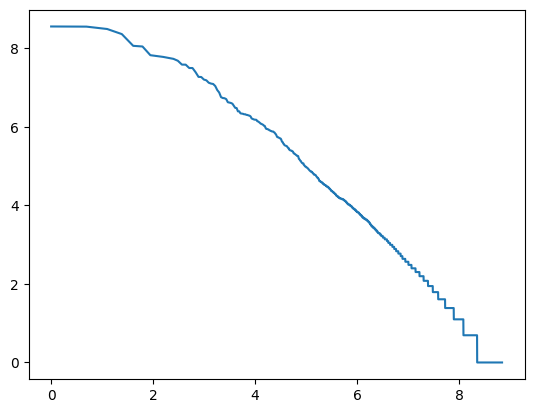

In [84]:
# A brief illustration of Zipf's law
import math # We will need the log() function
import matplotlib.pyplot as plt # And we will make a simple plot

# Calculate a list of the logs of the word frequency values using a list comprehension and sorting from largest to smallest.
log_freqs = [math.log(v) for v in sorted(fdist.values(), reverse=True)]

# Make a list of integers (i.e., ranks) and calculate their logs
log_ranks = [math.log(r+1) for r in range(len(log_freqs))]

plt.plot(log_ranks, log_freqs) # Show the result

In [93]:
# Question 8:
# Repeat the word frequency analysis process using the list of tokens that has the stop words taken out.
# This was created several blocks ago and has the name emmanostops.
# Add some lines of code to conduct the frequency analysis and finish up with a Zipf plot.

# Solution
fdist1 = FreqDist(emmanostops)
fdistkeys1 = list(fdist1.keys())
fdistkeys1[:20] # Look at the first 20 keys/words


['emma',
 'jane',
 'austen',
 'volume',
 'chapter',
 'woodhouse',
 'handsome',
 'clever',
 'rich',
 'comfortable',
 'home',
 'happy',
 'disposition',
 'seemed',
 'unite',
 'best',
 'blessings',
 'existence',
 'lived',
 'nearly']

In [97]:
fdist1['home'] # Look at the frequency of one word

128

In [98]:
topkeys1 = fdist1.most_common(20)

# In this for loop, "pair" refers to the word together with its frequency value
for pair in topkeys1:
    print (pair)

('emma', 860)
('could', 836)
('would', 818)
('miss', 599)
('must', 566)
('harriet', 500)
('much', 484)
('said', 483)
('one', 447)
('weston', 437)
('every', 435)
('thing', 394)
('think', 383)
('elton', 383)
('knightley', 379)
('well', 378)
('little', 359)
('never', 358)
('know', 335)
('might', 325)


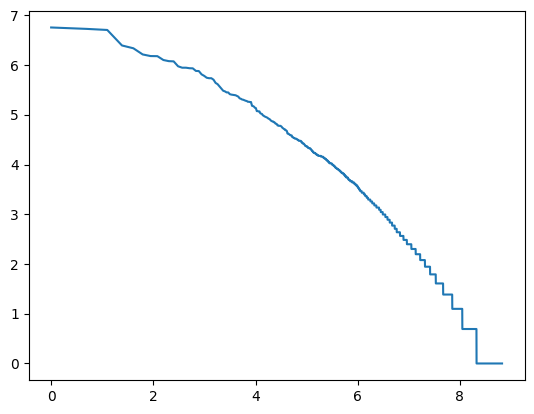

In [99]:
# Calculate a list of the logs of the word frequency values using a list comprehension and sorting from largest to smallest.
log_freqs = [math.log(v) for v in sorted(fdist1.values(), reverse=True)]

# Make a list of integers (i.e., ranks) and calculate their logs
log_ranks = [math.log(r+1) for r in range(len(log_freqs))]

plt.plot(log_ranks, log_freqs) # Show the result

## Section 2.7 ##

So far, we've worked with the words as they have originally appeared in the text. In this section we will use the **Porter Stemmer** to stem emmanostops and then repeat the frequency analysis that we did previously to see how our vocabulary has changed.

In [100]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

stem_nostops = [stemmer.stem(w) for w in emmanostops]

stem_nostops[0:20]

['emma',
 'jane',
 'austen',
 'volum',
 'chapter',
 'emma',
 'woodhous',
 'handsom',
 'clever',
 'rich',
 'comfort',
 'home',
 'happi',
 'disposit',
 'seem',
 'unit',
 'best',
 'bless',
 'exist',
 'live']

In [101]:
print(len(emmanostops)) # The original number of tokens
print(len(stem_nostops)) # The total number of stemmed tokens
print(len(set(emmanostops))) # # The vocabulary size unstemmed
print(len(set(stem_nostops))) # The vocabulary size stemmed

69693
69693
6808
4262


In [102]:
# Question 9:
# Repeat word frequency analysis using stem_nostops.
# Create appropriate graphs as shown above.

# Solution
fdist2 = FreqDist(stem_nostops)
fdistkeys2 = list(fdist2.keys())
fdistkeys2[:20] # Look at the first 20 keys/words


['emma',
 'jane',
 'austen',
 'volum',
 'chapter',
 'woodhous',
 'handsom',
 'clever',
 'rich',
 'comfort',
 'home',
 'happi',
 'disposit',
 'seem',
 'unit',
 'best',
 'bless',
 'exist',
 'live',
 'nearli']

In [103]:
topkeys2 = fdist2.most_common(20)
# In this for loop, "pair" refers to the word together with its frequency value
for pair in topkeys2:
    print (pair)

('emma', 860)
('could', 836)
('would', 818)
('miss', 611)
('must', 566)
('harriet', 500)
('much', 484)
('said', 483)
('think', 466)
('thing', 456)
('one', 451)
('weston', 445)
('everi', 435)
('elton', 405)
('say', 392)
('know', 391)
('knightley', 386)
('well', 378)
('littl', 362)
('never', 358)


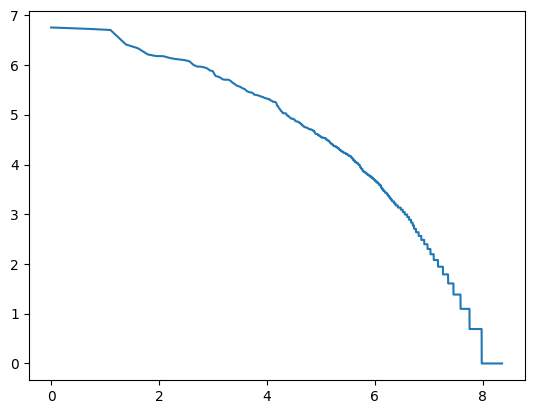

In [104]:
# Calculate a list of the logs of the word frequency values using a list comprehension and sorting from largest to smallest.
log_freqs = [math.log(v) for v in sorted(fdist2.values(), reverse=True)]

# Make a list of integers (i.e., ranks) and calculate their logs
log_ranks = [math.log(r+1) for r in range(len(log_freqs))]

plt.plot(log_ranks, log_freqs) # Show the result

Download a copy of this notebook with all of your exercises completed and the outputs of each code block retained. Then upload that file (which will have the .ipynb extension) to the appropriate drop box on Blackboard.

